<a href="https://colab.research.google.com/github/Eslam-elnahas/Data_Sets-Project/blob/main/Satellite_Imagery_EgyptDataset_D_L_Model_2_Edit_2Weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## **Coding of Data preparation **

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

!pip install opencv-python

In [4]:
import os
import cv2
from PIL import Image
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [5]:
minmaxscaler = MinMaxScaler()

In [6]:
!ls -lah '/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/EgyptDataset'


total 13K
-rw------- 1 root root  630 Mar 21 14:21  classes.json
drwx------ 4 root root 4.0K Mar 30 12:56 'Tile 1'
drwx------ 4 root root 4.0K Mar 30 12:56 'Tile 2'
drwx------ 4 root root 4.0K Mar 30 12:56 'Tile 3'


In [7]:
dataset_root_folder = '/content/drive/MyDrive/Colab Notebooks/datasets/Satellite'

In [8]:
dataset_name = "EgyptDataset"

In [8]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks': # 'images
    images = os.listdir(path)
    print(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.png')): # '.jpg
        #print(image_name)
        a = True

/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/EgyptDataset/Tile 1/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/EgyptDataset/Tile 2/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/EgyptDataset/Tile 3/masks


In [9]:
image_patch_size = 256

In [10]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.tif',1)

In [11]:
image.shape

(2228, 2228, 3)

In [12]:
!pip install patchify
from patchify import patchify


In [13]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [14]:
len(image_patches)

8

In [15]:
print(image_patches.shape)

(8, 8, 1, 256, 256, 3)


In [16]:
minmaxscaler = MinMaxScaler()

In [17]:
image_x = image_patches[0,0,:,:]
#MinMaxScaler
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)


In [18]:
image_y[0].shape

(256, 256, 3)

In [19]:
print(type(image))

<class 'numpy.ndarray'>


In [20]:
type(Image.fromarray(image))

PIL.Image.Image

In [21]:
image.shape

(2228, 2228, 3)

In [22]:
(image.shape[0]//image_patch_size)*image_patch_size

2048

In [23]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'tif'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,3):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)


In [24]:
print(len(image_dataset))
print(len(mask_dataset))

1152
1152


In [25]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [26]:
print(len(image_dataset))
print(len(mask_dataset))

1152
1152


In [27]:
type(image_dataset[0])

numpy.ndarray

In [28]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

numpy.ndarray

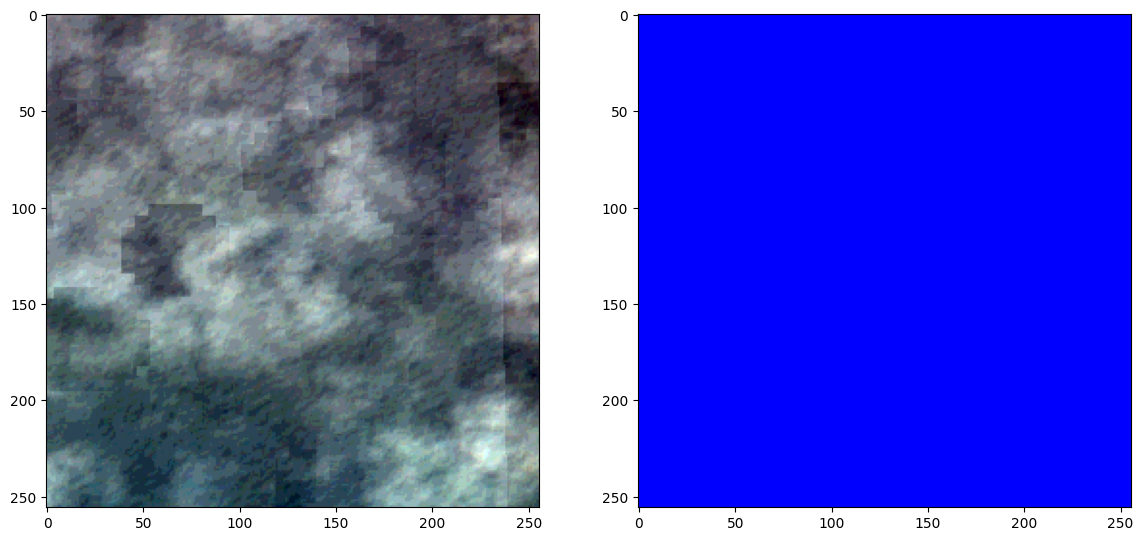

In [29]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [30]:
class_Agricultural_area = '#32CD32'
class_Agricultural_area = class_Agricultural_area.lstrip('#')
class_Agricultural_area = np.array(tuple(int(class_Agricultural_area[i:i+2], 16) for i in (0,2,4)))
print(class_Agricultural_area)

class_Built_area= '#804000'
class_Built_area= class_Built_area.lstrip('#')
class_Built_area= np.array(tuple(int(class_Built_area[i:i+2], 16) for i in (0,2,4)))
print(class_Built_area)

class_Water_Bodies = '#0000FF'
class_Water_Bodies = class_Water_Bodies.lstrip('#')
class_Water_Bodies = np.array(tuple(int(class_Water_Bodies[i:i+2], 16) for i in (0,2,4)))
print(class_Water_Bodies)

class_Road = '#9B9B9B'
class_Road = class_Road.lstrip('#')
class_Road = np.array(tuple(int(class_Road[i:i+2], 16) for i in (0,2,4)))
print(class_Road)

class_Bare_ground = '#8429F6'
class_Bare_ground = class_Bare_ground.lstrip('#')
class_Bare_ground = np.array(tuple(int(class_Bare_ground[i:i+2], 16) for i in (0,2,4)))
print(class_Bare_ground)

class_Unlabeled = '#808080'
class_Unlabeled = class_Unlabeled.lstrip('#')
class_Unlabeled = np.array(tuple(int(class_Unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_Unlabeled)

[ 50 205  50]
[128  64   0]
[  0   0 255]
[155 155 155]
[132  41 246]
[128 128 128]


In [31]:
mask_dataset.shape[0]

1152

In [32]:
label = individual_patched_mask

In [33]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_Bare_ground, axis=-1)] = 0
  label_segment[np.all(label == class_Water_Bodies, axis=-1)] = 1
  label_segment[np.all(label == class_Road, axis=-1)] = 2
  label_segment[np.all(label ==class_Agricultural_area , axis=-1)] = 3
  label_segment[np.all(label == class_Built_area, axis=-1)] = 4
  label_segment[np.all(label == class_Unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [34]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [35]:
print(len(labels))

1152


In [36]:
labels = np.array(labels)

array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [4, 4, 4, ..., 3, 3, 3],
       [4, 4, 4, ..., 3, 3, 3],
       [4, 4, 4, ..., 3, 3, 3]], dtype=uint8)
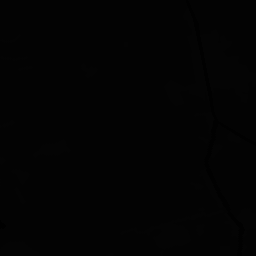

In [37]:



labels[3]

In [38]:
labels = np.expand_dims(labels, axis=3)

In [39]:
labels[0]

array([[[3],
        [3],
        [3],
        ...,
        [3],
        [3],
        [3]],

       [[3],
        [3],
        [3],
        ...,
        [3],
        [3],
        [3]],

       [[3],
        [3],
        [3],
        ...,
        [3],
        [3],
        [3]],

       ...,

       [[3],
        [3],
        [3],
        ...,
        [3],
        [3],
        [3]],

       [[3],
        [3],
        [3],
        ...,
        [3],
        [3],
        [3]],

       [[3],
        [3],
        [3],
        ...,
        [3],
        [3],
        [3]]], dtype=uint8)

In [40]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [41]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


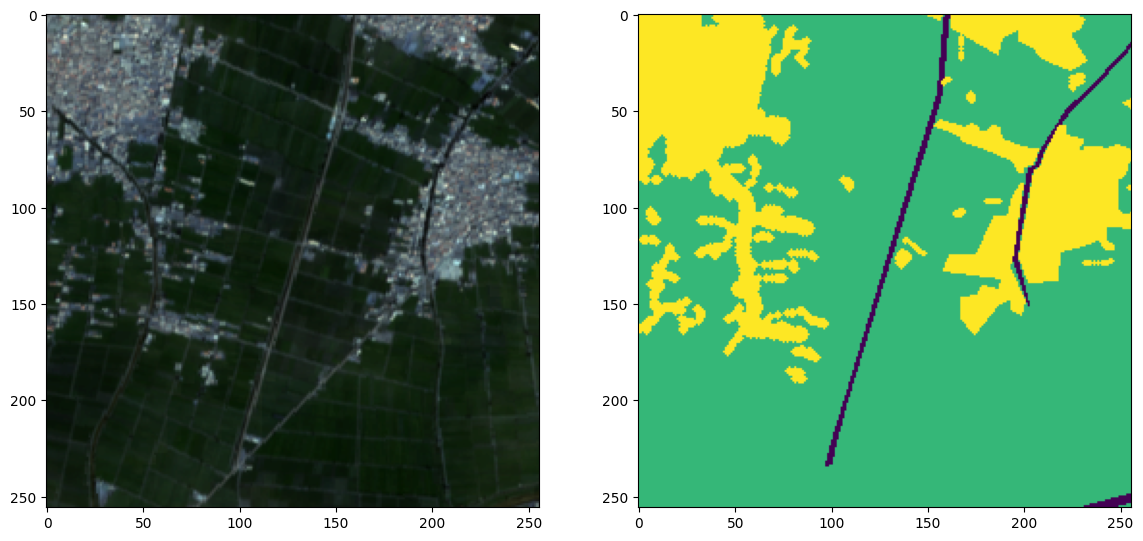

In [42]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]], dtype=uint8)
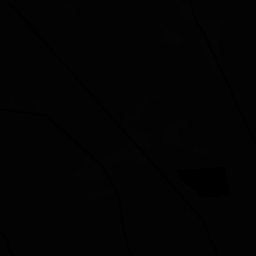

In [43]:
labels[0][:,:,0]

In [44]:
total_classes = len(np.unique(labels))

In [45]:
total_classes

6

In [46]:
!pip install tensorflow
from tensorflow.keras.utils import to_categorical

In [47]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [48]:
labels_categorical_dataset.shape

(1152, 256, 256, 6)

In [49]:
master_trianing_dataset = image_dataset

In [50]:
master_trianing_dataset.shape

(1152, 256, 256, 3)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [53]:
from re import X
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [54]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [55]:
# Coding of Deep learning Model

In [56]:
!pip install -U segmentation-models


In [57]:
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [58]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [59]:
from keras import backend as K

In [60]:
# كود قديم
# def Jaccard_coef(y_true,y_pred):
#   y_true_flatten=K.flatten(y_true)
#   y_pred_flatten=K.flatten(y_pred)
#   intersection=K.sum(y_true_flatten*y_pred_flatten)
#   final_coef_value=(intersection + 1.0 )/ (K.sum (y_true_flatten) + K.sum (y_pred_flatten) - intersection + 1.0)
#   return final_coef_value
# Modify your Jaccard_coef function to use tf.keras.backend functions# كود معدل جديد
def Jaccard_coef(y_true, y_pred):
  y_true_flatten = tf.keras.backend.flatten(y_true)
  y_pred_flatten = tf.keras.backend.flatten(y_pred)
  intersection = tf.keras.backend.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (tf.keras.backend.sum(y_true_flatten) + tf.keras.backend.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [61]:
def multi_unet_model(n_classes=5,image_height=256,image_width=256,image_channels=1):
  inputs=Input((image_height,image_width,image_channels))
  source_input = inputs
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)


  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)


  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)
  model = Model(inputs=[inputs], outputs=[outputs])
  return model


In [62]:
metrics = ["accuracy", Jaccard_coef]

In [63]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)


256
256
3
6


In [64]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [65]:
model = get_deep_learning_model()

In [66]:
# create Loss Funcation
# .dice loss > Focal Loss > Total Loss

# .Total Loss = (Dice loss + (1*Focal Loss))

In [67]:
#Old Weight
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

# الكود يستخدم [0.1666, 0.1666, ...] كأوزان للفئات، لكن هذا ليس دقيقًا.
# الحل: حساب الأوزان بناءً على عدد البكسلات لكل فئة:
#لحساب الاوزان عن طريق كل كلاس
# from sklearn.utils.class_weight import compute_class_weight
# unique_labels = np.unique(labels)
# weights = compute_class_weight(class_weight='balanced', classes=unique_labels, y=labels.flatten())
# print("Class Weights:", weights)


In [68]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)


In [69]:
focal_loss = sm.losses.CategoricalFocalLoss()


In [70]:
total_loss = dice_loss + (1 * focal_loss)


In [71]:
# Model compilation


In [72]:
import tensorflow as tf


In [73]:
# tf.compat.v1.reset_default_graph()


In [74]:
tf.keras.backend.clear_session()


In [75]:
# model.compile(optimizer="adam", loss=total_loss, metrics=metrics)
# Recompile the model with the updated metric
model.compile(optimizer="adam", loss=total_loss, metrics=[Jaccard_coef, 'accuracy'])

In [76]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 16)   │            448 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256, 256, 16)   │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 16)   │          2,320 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 16)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 32)   │          4,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128, 128, 32)   │              0 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 32)   │          9,248 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 32)     │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 64)     │         18,496 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 64, 64, 64)     │              0 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 32, 32, 64)     │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 32, 32, 128)    │         73,856 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 32, 32, 128)    │              0 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 32, 32, 128)    │        147,584 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 16, 16, 128)    │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)    

 Total params: 1,941,190 (7.41 MB)

 Trainable params: 1,941,190 (7.41 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
## Visualize Model with Keras


In [78]:
!pip install pydot
!apt-get install -y graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.7 MB/s eta 0:00:00


In [79]:
from tensorflow.keras.utils import plot_model
import pydot
import graphviz

In [80]:
plot_model(model, to_file='Satellite_model_plot.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) for `plot_model` to work.


In [81]:
from IPython.display import clear_output

%matplotlib inline

In [82]:
class PlotLoss(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.Jaccard_coef = []
    self.val_Jaccard_coef = []

    self.fig = plt.figure()
    self.logs = []

  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(logs)
    self.x.append(self.i)
    # self.losses.append(logs.get('loss'))
    # self.val_losses.append(logs.get('val_loss'))

    self.Jaccard_coef.append(logs.get('Jaccard_coef'))
    self.val_Jaccard_coef.append(logs.get('val_Jaccard_coef'))

    self.i += 1

    clear_output(wait=True)
    # plt.plot(self.x, self.losses, label="loss")
    # plt.plot(self.x, self.val_losses, label="val_loss")

    plt.plot(self.x, self.Jaccard_coef, label="Jaccard_coef")
    plt.plot(self.x, self.val_Jaccard_coef, label="val_Jaccard_coef")

    plt.legend()
    plt.show();

plot_loss = PlotLoss()


In [83]:
class PlotLossEx(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []

    self.losses = []
    self.val_losses = []

    self.Jaccard_coef = []
    self.val_Jaccard_coef = []

    self.fig = plt.figure()
    self.logs = []

  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(logs)
    self.x.append(self.i)

    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    self.Jaccard_coef.append(logs.get('Jaccard_coef'))
    self.val_Jaccard_coef.append(logs.get('val_Jaccard_coef'))

    self.i += 1

    plt.figure(figsize=(14,8))
    f, (graph1, graph2) = plt.subplots(1,2, sharex=True)

    clear_output(wait=True)

    graph1.set_yscale('log')
    graph1.plot(self.x, self.losses, label="loss")
    graph1.plot(self.x, self.val_losses, label="val_loss")
    graph1.legend()

    graph2.set_yscale('log')
    graph2.plot(self.x, self.Jaccard_coef, label="Jaccard_coef")
    graph2.plot(self.x, self.val_Jaccard_coef, label="val_Jaccard_coef")
    graph2.legend()

    plt.show();

plot_loss = PlotLossEx()

In [84]:
model_history = model.fit(X_train,y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=300,
                          validation_data=(X_test, y_test),
                          shuffle=False)


Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


62/62 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.4474 - jaccard_coef: 0.1887 - loss: 1.0127 - val_accuracy: 0.6617 - val_jaccard_coef: 0.3619 - val_loss: 0.9946
Epoch 2/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.6743 - jaccard_coef: 0.3738 - loss: 0.9778 - val_accuracy: 0.6961 - val_jaccard_coef: 0.5226 - val_loss: 0.9895
Epoch 3/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.7498 - jaccard_coef: 0.5003 - loss: 0.9668 - val_accuracy: 0.7594 - val_jaccard_coef: 0.5694 - val_loss: 0.9709
Epoch 4/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.7884 - jaccard_coef: 0.5528 - loss: 0.9609 - val_accuracy: 0.7361 - val_jaccard_coef: 0.5692 - val_loss: 0.9835
Epoch 5/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.8007 - jaccard_coef: 0.5703 - loss: 0.9580 - val_accuracy: 0.7472 - val_jaccard_coef: 0.5830 - val_loss: 0.9893
Epoch 6/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.8254 - jaccard_coef: 0.6079 - loss: 0.9536 - val_accurac

In [85]:
history_a=model_history
history_a.history

{'accuracy': [0.5248197913169861,
  0.7009539008140564,
  0.7622613906860352,
  0.7883185148239136,
  0.7946043014526367,
  0.8264196515083313,
  0.8444135189056396,
  0.8493422865867615,
  0.8613680601119995,
  0.8642188906669617,
  0.8743481040000916,
  0.8767735362052917,
  0.8821657299995422,
  0.8871232867240906,
  0.8903658986091614,
  0.8877427577972412,
  0.8833983540534973,
  0.8821861743927002,
  0.8938513398170471,
  0.890677809715271,
  0.8935869932174683,
  0.8930011987686157,
  0.8987010717391968,
  0.9011800289154053,
  0.8957329392433167,
  0.9094442129135132,
  0.9110075235366821,
  0.9066920280456543,
  0.908909797668457,
  0.912696123123169,
  0.9162046313285828,
  0.9168184399604797,
  0.908592164516449,
  0.9067797660827637,
  0.9192121028900146,
  0.9136284589767456,
  0.9209700226783752,
  0.9181697368621826,
  0.9246183633804321,
  0.9244931936264038,
  0.9266560077667236,
  0.9262315034866333,
  0.9256775975227356,
  0.9311568737030029,
  0.9312662482261658,
  

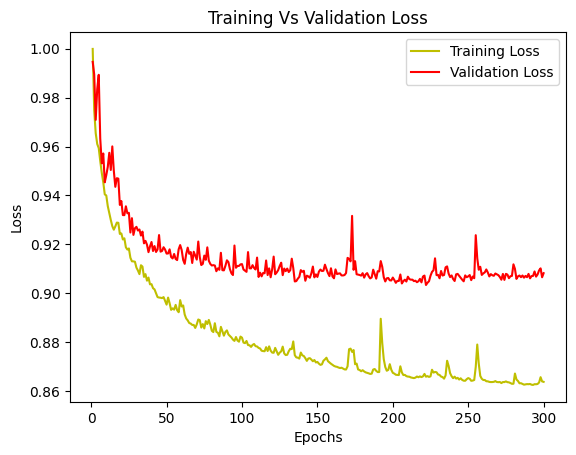

In [86]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

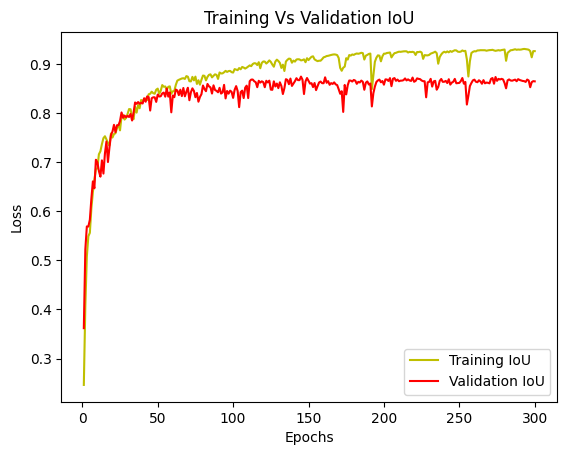

In [87]:
Jaccard_coef = history_a.history['jaccard_coef']
val_Jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(Jaccard_coef) + 1)
plt.plot(epochs, Jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_Jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [88]:
model_history.params


{'verbose': 1, 'epochs': 300, 'steps': 62}

In [89]:
y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 256, 256, 3))
  warnings.warn(msg)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 416ms/step


In [90]:
len(y_pred)

173

In [91]:
y_pred


array([[[[4.58084287e-07, 9.95801032e-01, 3.96803562e-11,
          4.19510808e-03, 3.13904820e-06, 2.84361590e-07],
         [2.14399742e-09, 9.99588430e-01, 1.24275158e-14,
          4.11516055e-04, 8.07645577e-08, 2.44820075e-08],
         [3.17766471e-08, 9.99559224e-01, 5.66679992e-15,
          4.36250906e-04, 2.71893498e-07, 4.24951759e-06],
         ...,
         [1.64259703e-07, 9.97573495e-01, 2.35417952e-11,
          2.42123147e-03, 2.02977162e-06, 3.09442703e-06],
         [2.27383893e-07, 9.96149898e-01, 1.02081087e-10,
          3.84421367e-03, 3.35422965e-06, 2.42108376e-06],
         [1.43650595e-05, 9.78607833e-01, 1.31160462e-07,
          2.09871884e-02, 2.43336428e-04, 1.47149272e-04]],

        [[1.82750215e-09, 9.99647021e-01, 1.88817429e-15,
          3.52965348e-04, 2.83487385e-08, 5.66310066e-09],
         [6.59620926e-12, 9.99977052e-01, 4.30542106e-19,
          2.29457073e-05, 2.80290263e-10, 3.07350506e-10],
         [1.33023689e-10, 9.99965489e-01, 3.2576

In [92]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [93]:
len(y_pred_argmax)

173

In [94]:
y_pred_argmax

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[3, 3, 3, ..., 4, 4, 4],
        [3, 3, 3, ..., 4, 4, 4],
        [3, 3, 3, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 3, 3, 3],
        [3, 4, 4, ..., 3, 3, 3],
        [3, 4, 4, ..., 3, 3, 3]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [3, 0, 0, ..., 1, 1, 1],
        [3, 1, 0, ..., 1, 1, 1],
        [3, 3, 0, ..., 1, 1, 1]],

       ...,

       [[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       [[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 1, ..., 

In [95]:
y_test_argmax = np.argmax(y_test, axis=3)

In [96]:
y_test_argmax

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[3, 3, 3, ..., 4, 4, 4],
        [3, 3, 3, ..., 4, 4, 4],
        [4, 3, 3, ..., 4, 4, 4],
        ...,
        [3, 3, 4, ..., 3, 3, 3],
        [3, 3, 4, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       ...,

       [[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       [[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 

In [97]:
##Comparing prediction results
##using test images using mask images and predicted result images..

In [98]:
import random

In [99]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


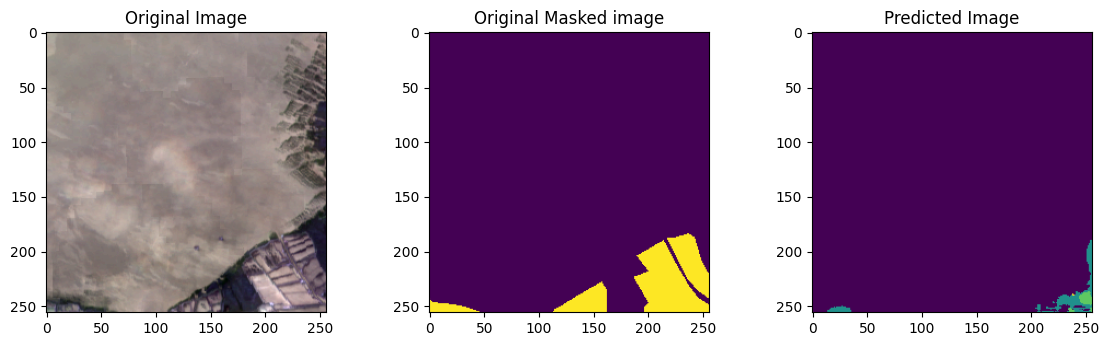

In [100]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [101]:
import keras.saving
keras.saving.save_model(model, 'my_model.keras')


In [ ]:
model.save("satellite_segmentation_Egypt_Data_set.h5")

In [ ]:
!ls -lah